### Import necessary libraries

In [1]:
!pip install PyPDF2
import PyPDF2
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


[notice] A new release of pip is available: 23.1 -> 23.3.2
[notice] To update, run: C:\Users\Haikoo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Helper functions for text feature extraction from pdf's

In [3]:
# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):

    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()

    return text


# Function to read data from a directory containing PDF files

def read_data_from_directory(directory_path):
    data = []
    labels = []
    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                print(file_name)
                file_path = os.path.join(label_path, file_name)
                if file_path.endswith('.pdf'):
                    text = extract_text_from_pdf(file_path)
                    data.append(text)
                    labels.append(label)

    return data, labels

In [5]:
all_directory = 'All'
X_raw, y = read_data_from_directory(all_directory)

Chevrolet_US Bolt_2020.pdf
Chevrolet_US Bolt_2021.pdf
Chevrolet_US Bolt_2022-2.pdf
Chevrolet_US Bolt_2022.pdf
Chevrolet_US Bolt_2023.pdf
Fiat_US 500L_2014.pdf
Fiat_US 500L_2017.pdf
Fiat_US 500L_2018.pdf
Fiat_US 500L_2019.pdf
Fiat_US 500L_2020.pdf
Mazda_US 3_2018.pdf
Mazda_US 3_2019.pdf
Mazda_US 3_2020.pdf
Mazda_US 3_2021.pdf
Mazda_US 3_2022.pdf
Mini_US 2019-2.pdf
Mini_US 2020.pdf
Mini_US 2021.pdf
Mini_US 2022.pdf
Mini_US 2023.pdf
VW_US Golf_GTI_2014.pdf
VW_US Golf_GTI_2015.pdf
VW_US Golf_GTI_2016.pdf
VW_US Golf_GTI_2019.pdf
VW_US Golf_GTI_2020.pdf
Ford_US Escape_2018.pdf
Ford_US Escape_2019.pdf
Ford_US Escape_2020.pdf
Ford_US Escape_2021.pdf
Ford_US Escape_2022.pdf
Ford_US Explorer_2017.pdf
Ford_US Explorer_2018.pdf
Ford_US Explorer_2019.pdf
Ford_US Explorer_2020.pdf
Ford_US Explorer_2021.pdf
Jeep_US Wrangler_2020.pdf
Jeep_US Wrangler_2021.pdf
Jeep_US Wrangler_2022.pdf
Jeep_US Wrangler_2023.pdf
Jeep_US Wrangler_2024.pdf
Lexus_US RX_2020.pdf
Lexus_US RX_2021.pdf
Lexus_US RX_2022.pdf
Lex

### Dataset split

In [6]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42)

### Experiment 1: Document Length Distribution

In this experiment, the distribution of document lengths (number of words) in the training set is visualized using a histogram. The x-axis represents the number of words, and the y-axis represents the frequency of documents with a specific word count.

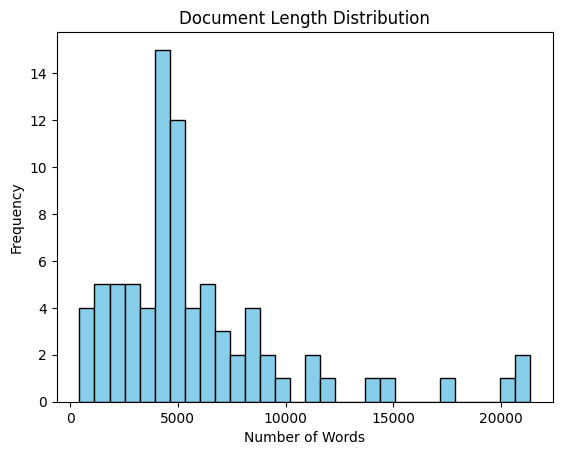

In [7]:
import matplotlib.pyplot as plt

document_lengths = [len(doc.split()) for doc in X_train_raw]
plt.hist(document_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Document Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### Observation:
The pdf word length peaks at 5000 words with some outliers having >20000 words as well. The distribution is right skewed in nature

### Experiment 2: Word Clouds for Each Car Type

Word clouds are generated for each car type in the training set. A word cloud visually represents the most frequent words in a collection of text, with word size proportional to its frequency. This experiment provides an intuitive overview of the distinctive words associated with each car type.

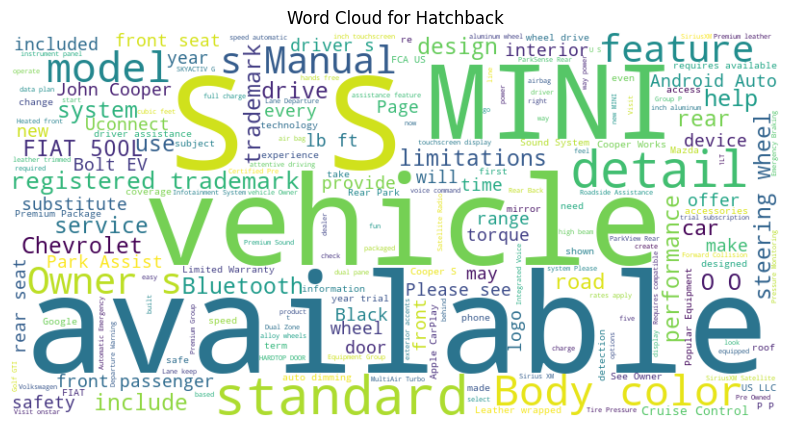

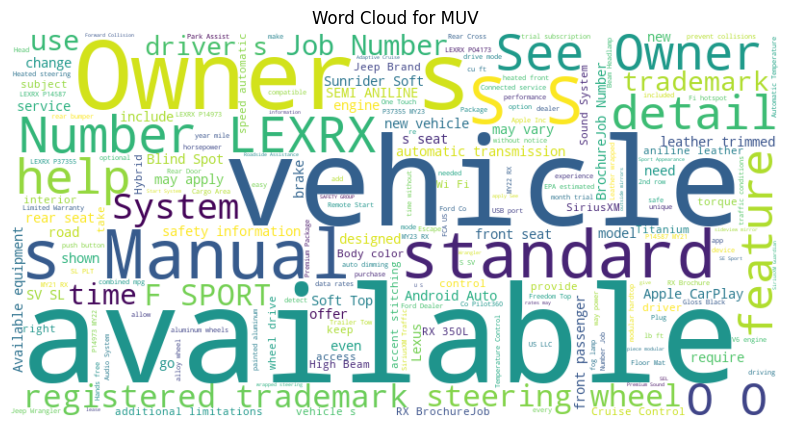

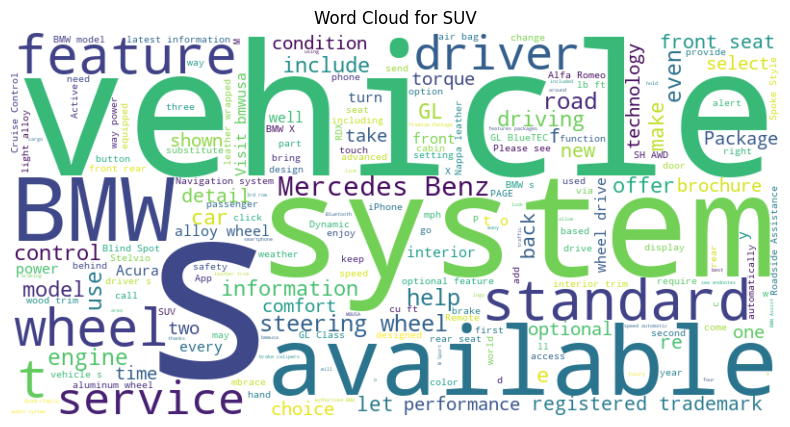

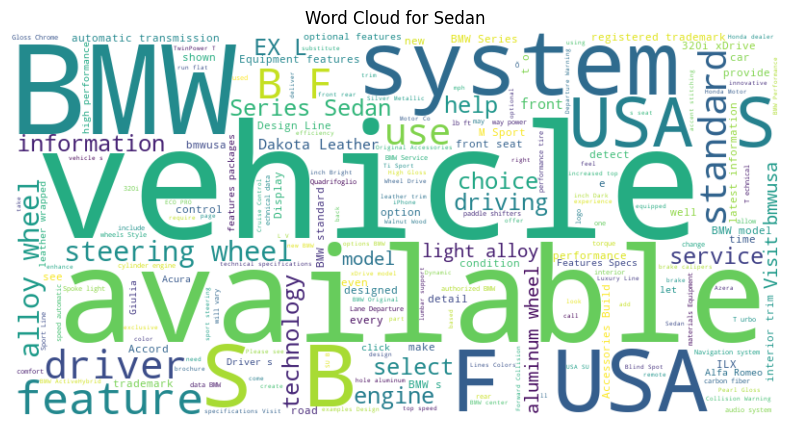

In [31]:
from wordcloud import WordCloud

# Assuming X_train_raw and y_train contain your training data and labels
for car_type in set(y_train):
    text_for_wordcloud = ' '.join(
        [X_train_raw[i] for i in range(len(X_train_raw)) if y_train[i] == car_type])

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white').generate(text_for_wordcloud)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {car_type}')
    plt.axis('off')
    plt.show()

### Experiment 3: Top 2-grams for Each Car Type

This experiment focuses on analyzing the top 20 2-grams (pairs of consecutive words) for each car type in the training set. Bar charts illustrate the frequency of these 2-grams, offering insights into specific word combinations that are characteristic of each car type.

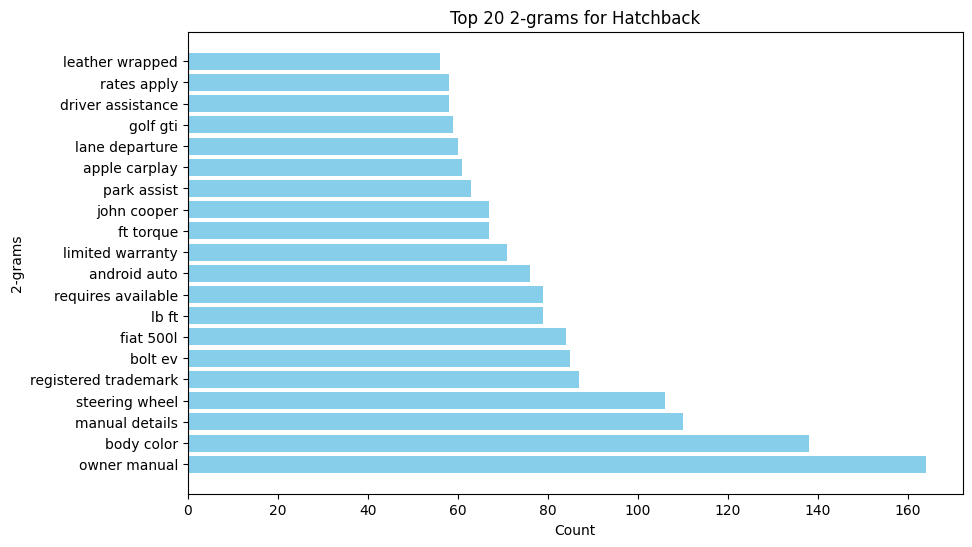

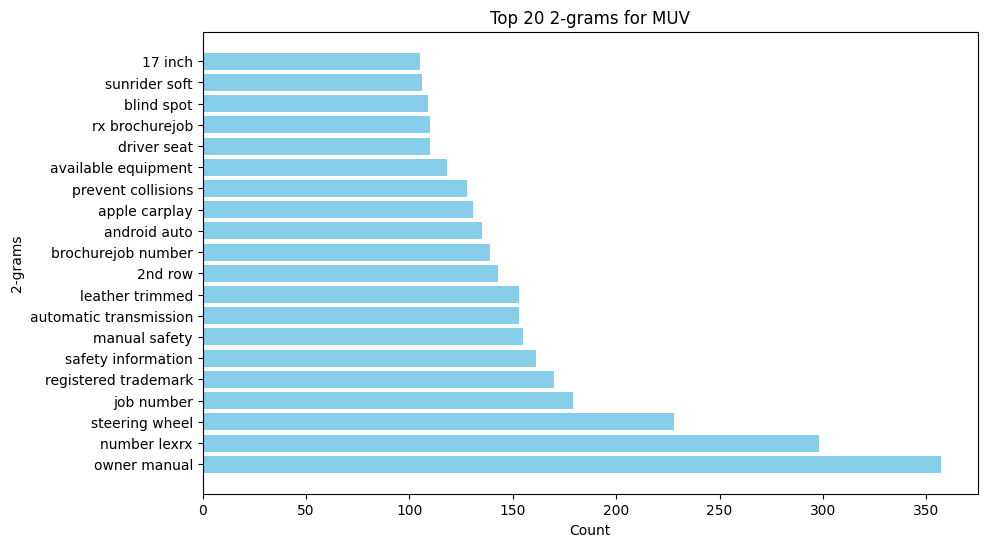

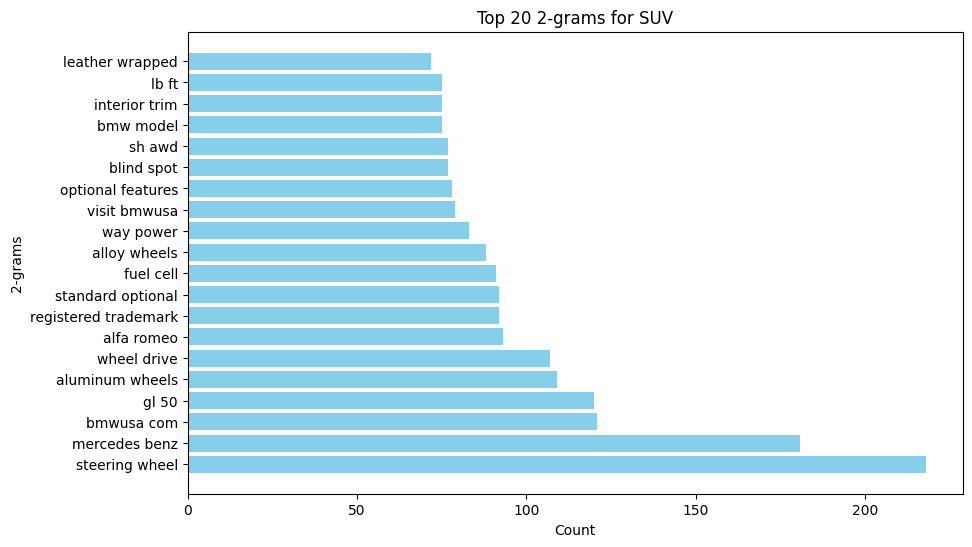

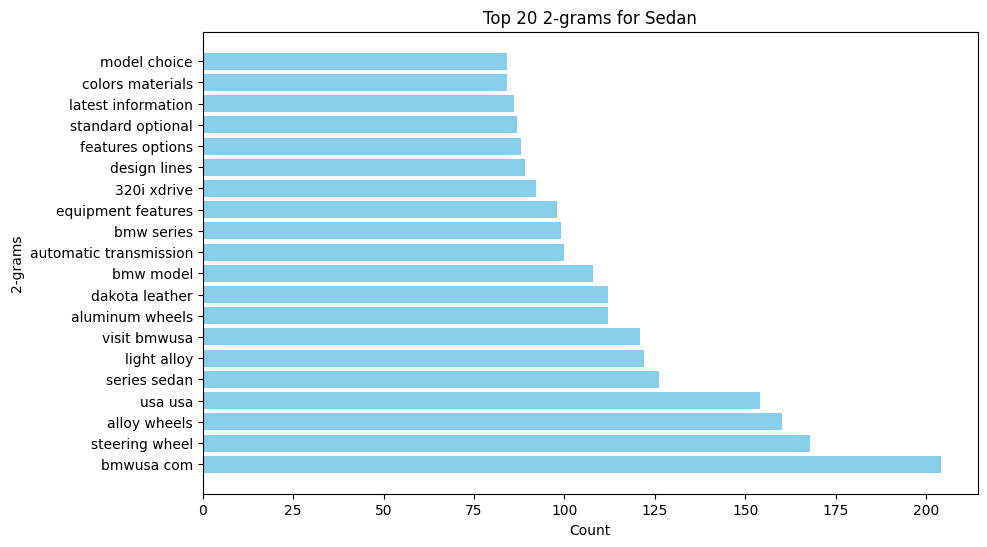

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

data_by_car_type = {car_type: [X_raw[i] for i in range(len(X_raw)) if y[i] == car_type][:25]
                    for car_type in set(y)}

# Plot top 2-grams for each car type
for car_type, data in data_by_car_type.items():
    # Vectorize for the specific car type
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    ngram_matrix = vectorizer.fit_transform(data)

    # Get feature names and their counts
    feature_names = vectorizer.get_feature_names_out()
    ngram_counts = ngram_matrix.sum(axis=0).tolist()[0]

    # Create a bar chart for the top n-grams
    top_ngrams_indices = sorted(
        range(len(ngram_counts)), key=lambda i: ngram_counts[i], reverse=True)[:20]
    top_ngrams = [feature_names[i] for i in top_ngrams_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(top_ngrams, [ngram_counts[i]
             for i in top_ngrams_indices], color='skyblue')
    plt.title(f'Top 20 2-grams for {car_type}')
    plt.xlabel('Count')
    plt.ylabel('2-grams')
    plt.show()

### Experiment 4: Sentiment Distribution

The sentiment distribution in the training set is examined by calculating the polarity of each document using the TextBlob library. A histogram is used to visualize the distribution of sentiment polarity scores, providing an understanding of the overall sentiment within the dataset.

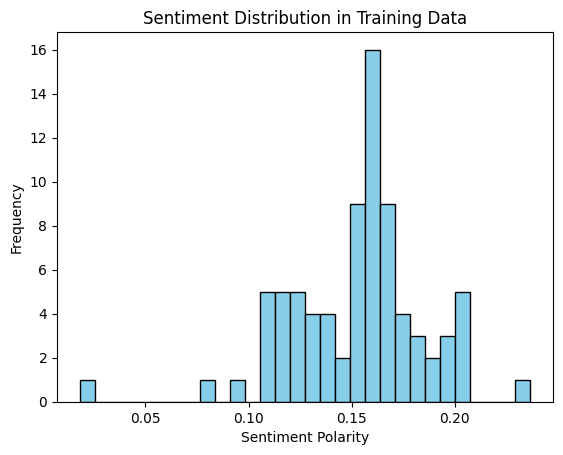

In [36]:
from textblob import TextBlob



sentiments = [TextBlob(text).sentiment.polarity for text in X_train_raw]


plt.hist(sentiments, bins=30, color='skyblue', edgecolor='black')


plt.title('Sentiment Distribution in Training Data')


plt.xlabel('Sentiment Polarity')


plt.ylabel('Frequency')


plt.show()

### Experiment 5: Average Word Length Distribution

This experiment explores the distribution of average word lengths for each car type in the training set. For each car type, the average word length is calculated and visualized using histograms. This analysis sheds light on the linguistic characteristics of text associated with different car types.

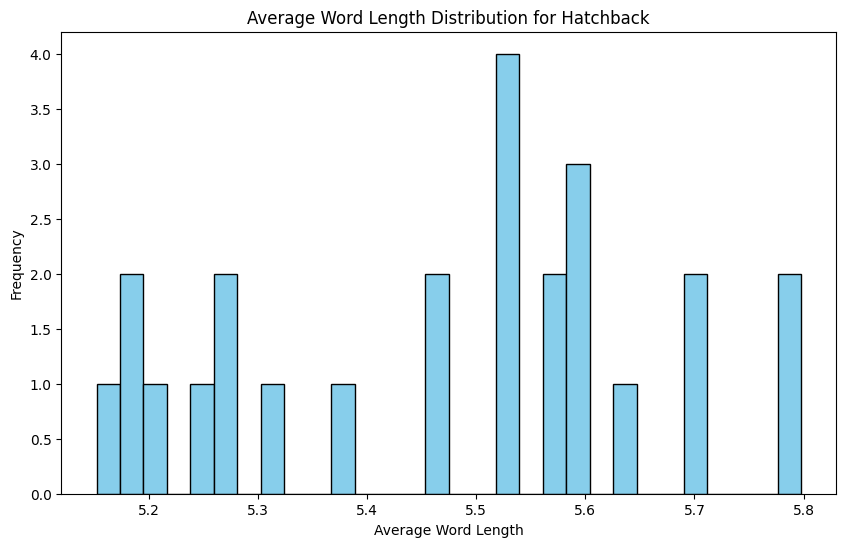

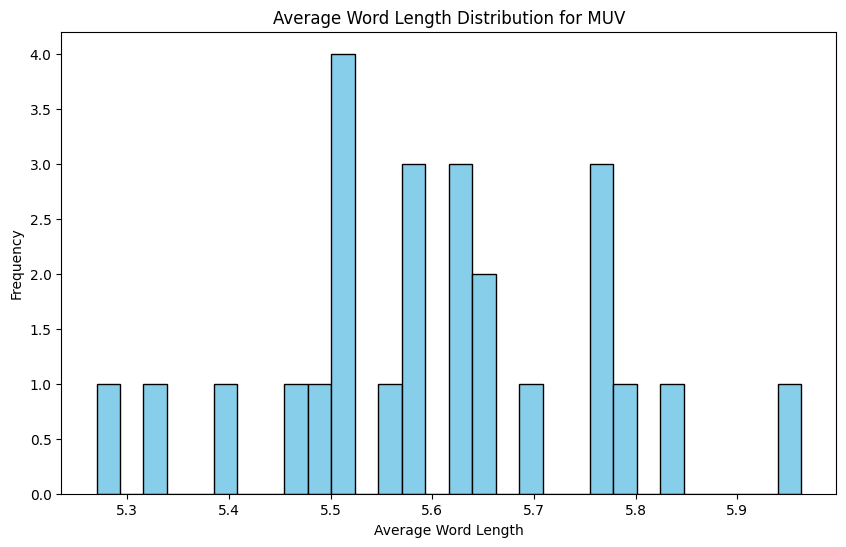

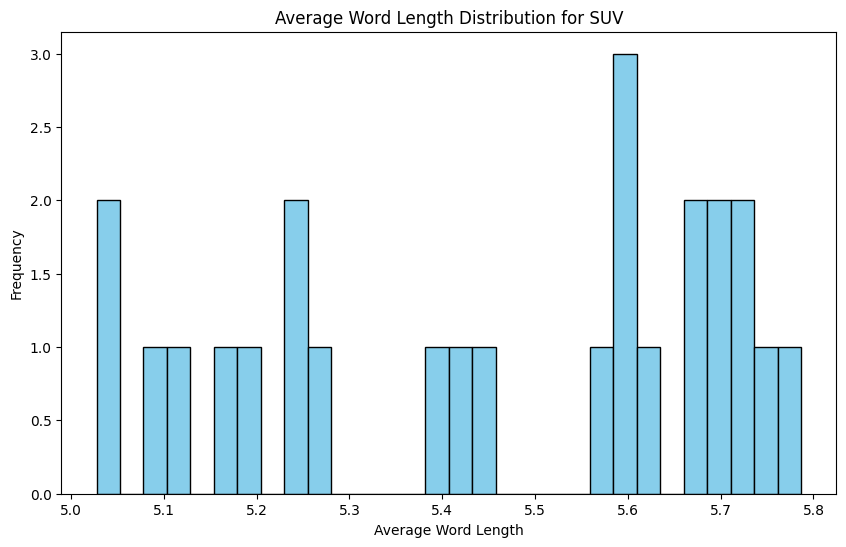

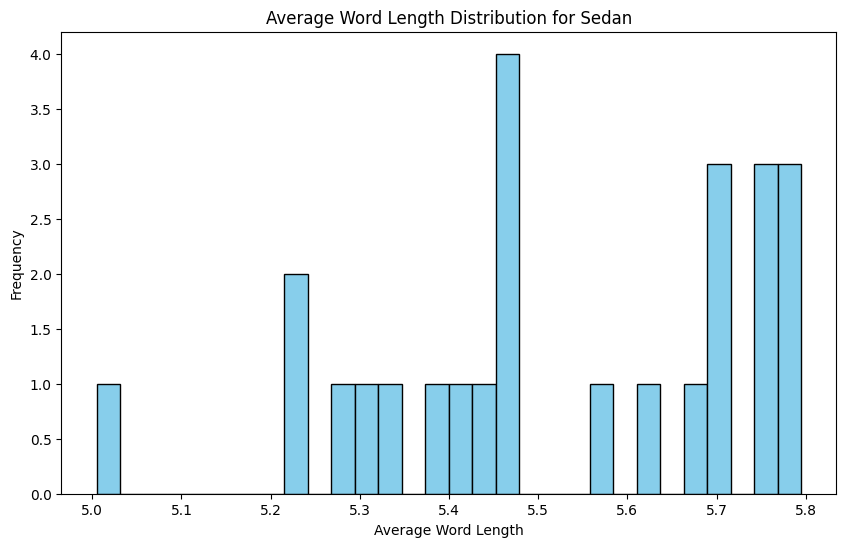

In [39]:
data_by_car_type = {car_type: [X_raw[i] for i in range(len(X_raw)) if y[i] == car_type][:25]
                    for car_type in set(y)}

# Plot average word length for each car type
for car_type, data in data_by_car_type.items():
    # Calculate average word length for the specific car type
    average_word_lengths = [
        sum(len(word) for word in text.split()) / len(text.split()) for text in data]

    # Plot the average word length distribution
    plt.figure(figsize=(10, 6))
    plt.hist(average_word_lengths, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Average Word Length Distribution for {car_type}')
    plt.xlabel('Average Word Length')
    plt.ylabel('Frequency')
    plt.show()